## Kinetic Monte-Carlo

In [1]:
import numpy                as np
import matplotlib.pyplot    as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
import scipy.constants      as cst
import random

In [2]:
"CONSTANTES"
kB = cst.physical_constants['Boltzmann constant'][0]
eV = cst.physical_constants['electron volt'][0]
h  = cst.physical_constants['Planck constant'][0]

In [3]:
"PARAMETRES"
T  = 800       # Température (K)
ES = 1.3 * eV  # Energie atome-substrat (eV)
EN = 0.3 * eV  # Energie atome-voisin (eV)
L  = 300       # Nombre d'atomes sur une ligne de la grille
theta = 0.25    # Coverage

"PROBABILITES"
F  = 0.1                # Nombre d'atomes déposés sur une colonne par seconde
t_dep = 1 / (F * L**2)  # Intervalle de temps entre deux dépôts sur la grille de L^2 atomes

D  = (2*kB*T/h) * np.exp(-ES/(kB*T))  # Nombre de sauts effectués par un atome (sans voisins) par seconde
t_diff = 1 / D                        # Intervalle de temps entre deux sauts pour un atome sans voisins

# Poids de la constante de vitesse dû aux voisins:
p0 = 1
p1 = np.exp(-1*EN/(kB*T))
p2 = np.exp(-2*EN/(kB*T))
p3 = np.exp(-3*EN/(kB*T))
p4 = np.exp(-4*EN/(kB*T))
P  = [p0, p1, p2, p3, p4]  # P[n] est la probabilité à utiliser pour n voisins
print(P)

th=3

[1, 0.0128849631398885, 0.0001660222751162853, 2.1391908952737618e-06, 2.7563395834787528e-08]


In [4]:
"Ajout d'un atome sur la colonne (i, j)"
def add_atom(i,j):
    
    C_ini = int(Classe[i,j])
    Types[C_ini].remove( (i, j) ) # retirer la colonne de la table de classes
    
    # Si le nouvel atome va dépasser ses voisins, baisser la classe de la colonne:
    if H[i,j] == H[np.mod(i-1,L), j]:
        Classe[i,j] -= 1
    if H[i,j] == H[np.mod(i+1,L), j]:
        Classe[i,j] -= 1
    if H[i,j] == H[i, np.mod(j-1,L)]:
        Classe[i,j] -= 1
    if H[i,j] == H[i, np.mod(j+1,L)]:
        Classe[i,j] -= 1
        
    C_fin = int(Classe[i,j])
    Types[C_fin].append( (i, j) ) # ajouter la colonne à la table de classes
    
    if (C_ini > th) and (C_fin <= th):
        #Immobile.remove( (i, j) )
        Mobile.append( (i, j) ) 
        
        
    H[i,j] += 1  # ajouter l'atome en (i, j)
        
    # Si le nouvel atome change la classe des colonnes voisines:
    if H[i,j] == H[np.mod(i-1,L), j]:
        
        C = int(Classe[np.mod(i-1,L), j])
        Types[C].remove( (np.mod(i-1,L), j) )
        Classe[np.mod(i-1,L),j] += 1
        Types[C+1].append( (np.mod(i-1,L), j) )
        
        if C==th:
            #Immobile.append( (np.mod(i-1,L), j) )
            Mobile.remove( (np.mod(i-1,L), j) ) 
        
    if H[i,j] == H[np.mod(i+1,L), j]:
        
        C = int(Classe[np.mod(i+1,L), j])
        Types[C].remove( (np.mod(i+1,L), j) )
        Classe[np.mod(i+1,L),j] += 1
        Types[C+1].append( (np.mod(i+1,L), j) )
        
        if C==th:
            #Immobile.append( (np.mod(i+1,L), j) )
            Mobile.remove( (np.mod(i+1,L), j) ) 
        
    if H[i,j] == H[i, np.mod(j-1,L)]:
        
        C = int(Classe[i, np.mod(j-1,L)])
        Types[C].remove( (i, np.mod(j-1,L)) )
        Classe[i,np.mod(j-1,L)] += 1
        Types[C+1].append( (i, np.mod(j-1,L)) )
        
        if C==th:
            #Immobile.append( (i, np.mod(j-1,L)) )
            Mobile.remove( (i, np.mod(j-1,L)) ) 
        
    if H[i,j] == H[i, np.mod(j+1,L)]:
        
        C = int(Classe[i, np.mod(j+1,L)])
        Types[C].remove( (i, np.mod(j+1,L)) )
        Classe[i,np.mod(j+1,L)] += 1
        Types[C+1].append( (i, np.mod(j+1,L)) )
        
        if C==th:
            #Immobile.append( (i, np.mod(j+1,L)) )
            Mobile.remove( (i, np.mod(j+1,L)) ) 


"Suppression d'un atome sur la colonne (i, j)"        
def remove_atom(i,j):
    
    # Si la suppression change la classe des colonnes voisines:
    if H[i,j] == H[np.mod(i-1,L), j]:
        
        C = int(Classe[np.mod(i-1,L), j])
        Types[C].remove( (np.mod(i-1,L), j) )
        Classe[np.mod(i-1,L),j] -= 1
        Types[C-1].append( (np.mod(i-1,L), j) )
        
        if C==th+1:
            #Immobile.remove( (np.mod(i-1,L), j) )
            Mobile.append( (np.mod(i-1,L), j) ) 
        
    if H[i,j] == H[np.mod(i+1,L), j]:
        
        C = int(Classe[np.mod(i+1,L), j])
        Types[C].remove( (np.mod(i+1,L), j) )
        Classe[np.mod(i+1,L),j] -= 1
        Types[C-1].append( (np.mod(i+1,L), j) )
        
        if C==th+1:
            #Immobile.remove( (np.mod(i+1,L), j) )
            Mobile.append( (np.mod(i+1,L), j) ) 
        
    if H[i,j] == H[i, np.mod(j-1,L)]:
        
        C = int(Classe[i, np.mod(j-1,L)])
        Types[C].remove( (i, np.mod(j-1,L)) )
        Classe[i,np.mod(j-1,L)] -= 1
        Types[C-1].append( (i, np.mod(j-1,L)) )
        
        if C==th+1:
            #Immobile.remove( (i, np.mod(j-1,L)) )
            Mobile.append( (i, np.mod(j-1,L)) ) 
        
    if H[i,j] == H[i, np.mod(j+1,L)]:
        
        C = int(Classe[i, np.mod(j+1,L)])
        Types[C].remove( (i, np.mod(j+1,L)) )
        Classe[i,np.mod(j+1,L)] -= 1
        Types[C-1].append( (i, np.mod(j+1,L)) )
        
        if C==th+1:
            #Immobile.remove( (i, np.mod(j+1,L)) )
            Mobile.append( (i, np.mod(j+1,L)) ) 
        
    H[i,j] -= 1  # supprimer l'atome en (i, j)
    
    C_ini = int(Classe[i,j])
    Types[C_ini].remove( (i, j) )
        
    # Si le nouvel atome gagne des voisins, augmenter sa classe:
    if H[i,j] == H[np.mod(i-1,L), j]:
        Classe[i,j] += 1
    if H[i,j] == H[np.mod(i+1,L), j]:
        Classe[i,j] += 1
    if H[i,j] == H[i, np.mod(j-1,L)]:
        Classe[i,j] += 1
    if H[i,j] == H[i, np.mod(j+1,L)]:
        Classe[i,j] += 1
        
    C_fin = int(Classe[i,j])
    Types[C_fin].append( (i, j) )
    
    if (C_fin > th) and (C_ini <= th):
        #Immobile.append( (i, j) )
        Mobile.remove( (i, j) )


"Kinetic Monte Carlo"
def KMC():
    s=0
    'Deposition'
    for S in range(0, n_dep):

        I, J = np.random.randint(L, size=2) # on choisit au hasard une colonne (I, J) sur la grille
        add_atom(I, J)                      # on y ajoute un atome
        
        if ((S+1) % 10) == 0: # Suivre l'avancée du calcul
            print('Atomes déposés: '+str(S+1))
            
        if (100*(S+1)/(L**2) % 5) == 0: # Si coverage multiple de 5
            print('Coverage: '+str(100*(S+1)/(L**2)))    
            np.savetxt('L='+str(L)+'F='+str(F)+'T='+str(T)+'theta='+str(100*(S+1)/(L**2))+'EN='+str(EN/eV)+'.txt', H)

        'Diffusion'
        t = 0             # reset le compteur de temps
        #print(s)
        s=0
        while t < t_dep:  # On diffuse pendant le temps t_dep avant la nouvelle déposition
            s=s+1
            
            N = len(Mobile) # Nombre d'atomes qui peuvent bouger (P[n] non négligeable)

            t += t_diff/N # Ajout de l'intervalle de temps pour 1 saut pour le nombre d'atomes mobiles considéré
            
            i, j = random.choice(Mobile) # on choisit au hasard un atome mobile
            C = int(Classe[i, j])                            # on lit la classe de l'atome choisi

            
            if (C > 4) or (C < 0):  # Vérifier que la classe n'est pas aberrante
                print('ERREUR: Classe impossible !!')
                print(C)
            

            p = P[C]    # probabilité d'accepter le saut pour la classe de l'atome choisi
            
            r = np.random.rand()
            if r < p: # si le saut est accepté

                # On déplace l'atome selon l'une des quatres directions:
                r2 = np.random.rand()
                remove_atom(i, j)
                if r2 < 0.25:
                        add_atom(np.mod(i-1, L), j)
                if 0.25 < r2 < 0.50:
                        add_atom(np.mod(i+1, L), j)
                if 0.50 < r2 < 0.75:
                        add_atom(i, np.mod(j-1, L))
                if 0.75 < r2 < 1:
                        add_atom(i, np.mod(j+1, L))
                        
                # A ajouter: condition sur la différence de hauteur entre les colonnes de départ et d'arrivée
                
                

In [ ]:
"SIMULATION"

"Nombre total d'atomes à déposer"
n_dep = int(L**2*theta)
print('Atomes à déposer: '+str(n_dep))

'Matrice H initiale: 0 atomes partout'
H = np.ones((L,L)) * 0

'Matrice des classes initiale: 4 voisins partout'
Classe = np.ones((L,L)) * 4

'Liste des types initiale: toutes les coordonnées (i, j) dans Types[4]'
Columns = []
for i in range(0, L):
    for j in range(0, L):
        Columns.append((i, j))
Types = [[], [], [], [], Columns]  # Liste des colonnes (i, j) de classe 0, 1, 2, 3, 4

#Immobile = Columns.copy()

Mobile = []

'Lancer la simulation Monte-Carlo'
KMC()

Atomes à déposer: 22500
Atomes déposés: 10
Atomes déposés: 20
Atomes déposés: 30
Atomes déposés: 40
Atomes déposés: 50
Atomes déposés: 60
Atomes déposés: 70
Atomes déposés: 80
Atomes déposés: 90
Atomes déposés: 100
Atomes déposés: 110
Atomes déposés: 120
Atomes déposés: 130
Atomes déposés: 140
Atomes déposés: 150
Atomes déposés: 160
Atomes déposés: 170
Atomes déposés: 180
Atomes déposés: 190
Atomes déposés: 200
Atomes déposés: 210
Atomes déposés: 220
Atomes déposés: 230
Atomes déposés: 240
Atomes déposés: 250
Atomes déposés: 260
Atomes déposés: 270
Atomes déposés: 280
Atomes déposés: 290
Atomes déposés: 300
Atomes déposés: 310
Atomes déposés: 320
Atomes déposés: 330
Atomes déposés: 340
Atomes déposés: 350
Atomes déposés: 360
Atomes déposés: 370
Atomes déposés: 380
Atomes déposés: 390
Atomes déposés: 400
Atomes déposés: 410
Atomes déposés: 420
Atomes déposés: 430
Atomes déposés: 440
Atomes déposés: 450
Atomes déposés: 460
Atomes déposés: 470
Atomes déposés: 480
Atomes déposés: 490
Atome

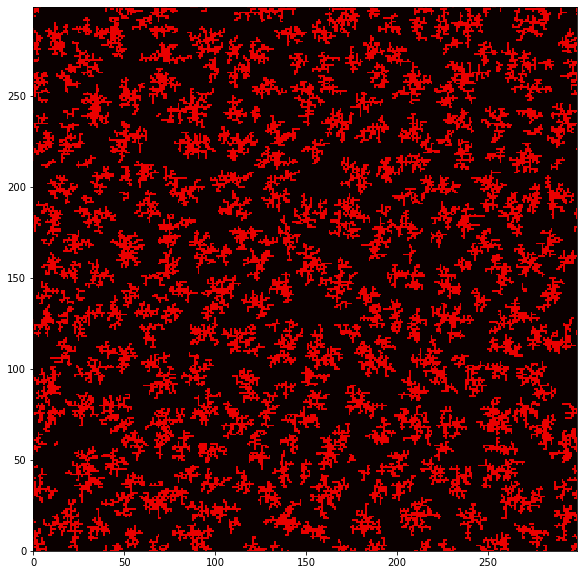

In [56]:
"RESULTATS"

np.savetxt('L='+str(L)+'F='+str(F)+'T='+str(T)+'theta='+str(theta)+'EN='+str(EN/eV)+'.txt', H)

'Tracer la surface en 2D'
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.imshow(H, cmap='hot', vmax=3, vmin=0)

ax.set_xlim(0,L-1)
ax.set_ylim(0,L-1)

plt.show()

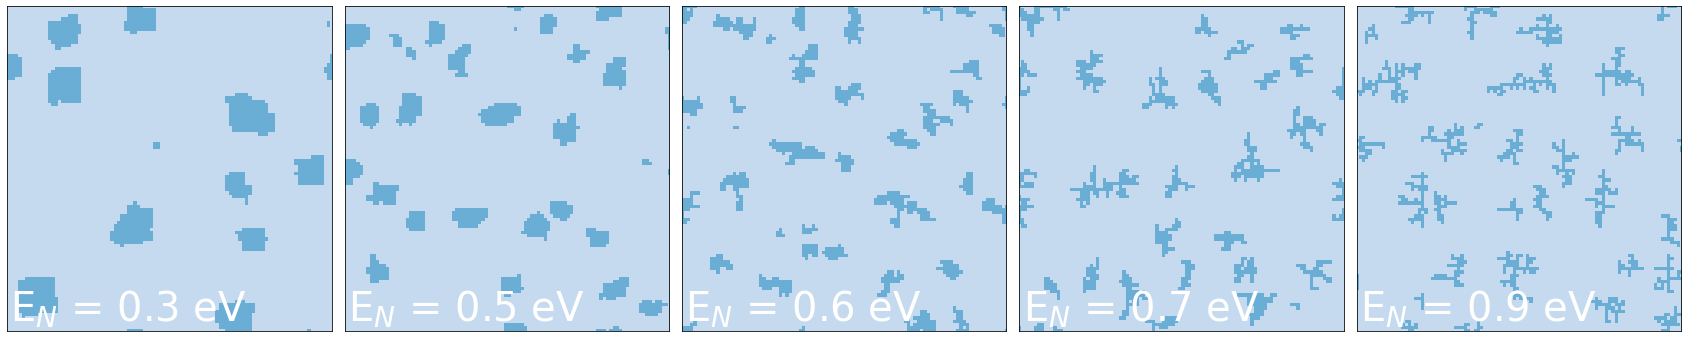

In [84]:
"COMPARAISON EN"

'Tracer la surface en 2D'
%matplotlib inline
fig, ax = plt.subplots(1, 5, figsize=(30,150))
fig.subplots_adjust(wspace=0.04)

Elist = [0.3,0.5,0.6,0.7,0.9]

for i in range(0,len(Elist)):
    E = Elist[i]
    HH = np.loadtxt('L='+str(L)+'F='+str(F)+'T='+str(T)+'theta='+str(theta)+'EN='+str(E)+'.txt')
    ax[i].imshow(HH, cmap='Blues', vmax=3, vmin=-1)

    ax[i].set_xlim(0,L-1)
    ax[i].set_ylim(0,L-1)
    
    ax[i].text(1, 3, r'E$_N$ = '+str(E)+' eV',fontsize=40,color='white')
    
    ax[i].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    ax[i].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

plt.show()

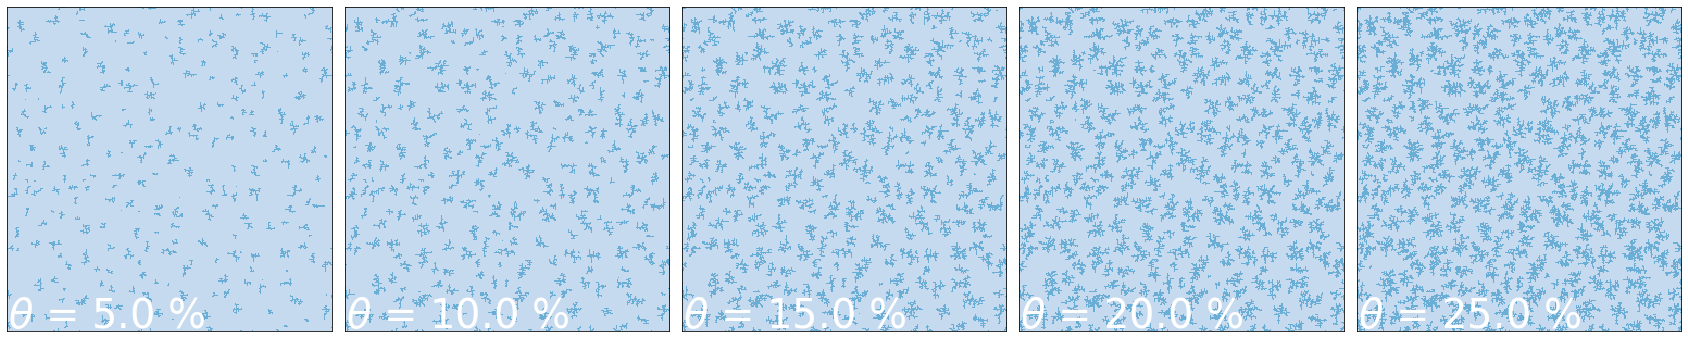

In [58]:
"COMPARAISON theta"

'Tracer la surface en 2D'
%matplotlib inline
fig, ax = plt.subplots(1, 5, figsize=(30,150))
fig.subplots_adjust(wspace=0.04)

thetalist = [5.0, 10.0, 15.0, 20.0, 25.0]

for i in range(0,len(thetalist)):
    E = thetalist[i]
    HH = np.loadtxt('L='+str(L)+'F='+str(F)+'T='+str(T)+'theta='+str(E)+'EN='+str(EN/eV)+'.txt')
    ax[i].imshow(HH, cmap='Blues', vmax=3, vmin=-1)

    ax[i].set_xlim(0,L-1)
    ax[i].set_ylim(0,L-1)
    
    ax[i].text(1, 3, r'$\theta$ = '+str(E)+' %',fontsize=40,color='white')
    
    ax[i].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    ax[i].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

plt.show()

17.647058823529413
Theta sum:0.016043144208037825
32.846715328467155
Theta sum:0.01570902777777778
48.38709677419355
Theta sum:0.018520036429872495
64.51254480286738
Theta sum:0.01894601677148847
83.02214022140221
Theta sum:0.017681068983675618


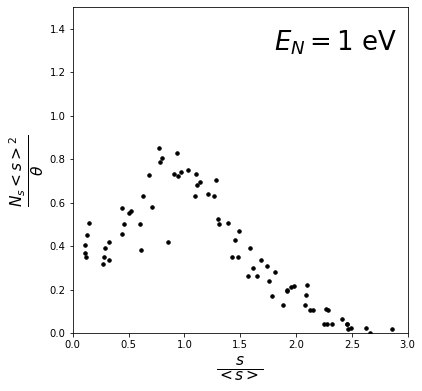

In [80]:
"CONNECTED COMPONENT ANALYSIS"

from scipy.ndimage.measurements import label

thetalist = [5.0, 10.0, 15.0, 20.0, 25.0]

fig, ax = plt.subplots(figsize=(6,6))

for i in range(len(thetalist)):
    
    thetaval = thetalist[i]

    Hmap = np.loadtxt('L=300F=0.1T=800theta='+str(thetaval)+'EN=1.0.txt')

    graph = np.where(Hmap > 0,1,0) # graphe des ilôts: 1 si h>0, 0 sinon

    structure = [[0,1,0],[1,1,1],[0,1,0]]  # connection filter: les atomes doivent se toucher par une arête !

    'Trouver les composantes connexes'
    label_image, ncomponents = label(graph, structure)

    'Appliquer les conditions périodiques'
    for y in range(label_image.shape[0]):
        if label_image[y, 0] > 0 and label_image[y, -1] > 0:
            label_image[label_image == label_image[y, -1]] = label_image[y, 0]
    for x in range(label_image.shape[1]):
        if label_image[0, x] > 0 and label_image[-1, x] > 0:
            label_image[label_image == label_image[-1, x]] = label_image[0, x]
            
            
    "Distribution des tailles d'ilôts"
    sizes = []
    for compo in range(1, np.max(label_image)+1):
        size = np.sum(np.where(label_image==compo,1,0))
        if size != 0:
            sizes.append(size)

    mean = np.mean(sizes) # smean
    print(mean)
    normsizes=sizes/mean
    
    histY, histX = np.histogram(normsizes, bins=15) # histY = nb of islands in a bin on the s/smean scale

    deltaX = histX[1] - histX[0] # taille de la bin sur l'axe s/smean
    histX = histX[:-1]+deltaX/2  # positions des milieux des bins
    
    histY = histY / (deltaX*mean) # normaliser l'histogramme par la taille de la bin sur l'axe s
    
    Ns = histY / (300**2) # Passer de nombre à densité surfacique 
    
    print('Theta sum:'+str(np.sum(Ns*histX*mean))) # recalculer theta (vérif)
    
    normNs = Ns * mean**2 / (thetaval/100) 

    ax.scatter(histX, normNs, s=12, color='k')
    
    #ax.scatter(thetaval, mean)
    
    
ax.set_xlabel(r'$\frac{s}{<s>}$', fontsize=22)
ax.set_ylabel(r'$\frac{N_s <s>^2}{\theta}$', fontsize=22)
ax.set_xlim(0, 3)
ax.set_ylim(0, 1.5)

ax.text(1.8, 1.3, r'$E_N = 1$ eV', fontsize=26, color='k')

plt.show()
        
        
        
#'Tracer les composantes connexes'
#%matplotlib inline
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111)
#ax.imshow(label_image, cmap='hot', vmax=np.max(label_image), vmin=0)
#plt.show()


